#**Mount Drive**

In [ ]:
from google.colab import drive
# Defines access to just one directory in my drive
folder_path = '/content/drive/My Drive/Capstone'

# Mounts drive over previous mount
drive.mount('/content/drive', force_remount=True)

#Make sure path '/content/mydrive' exists or create it
!mkdir -p /content/mydrive
#Symbolic link to folder path
!ln -sf "$folder_path" /content/mydrive/Capstone

ModuleNotFoundError: ignored

#**Import Statements**

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#**SQL  Query Functions**

In [ ]:
#@title Define Function to list tables in database
def list_tables(db_path):
    """
    A function that lists tables in an sqlite database file.

    Parameters
    ----------
    db_path: str
        Path to desired database file.

    Returns
    -------
    dataframe
        Dataframe containing table names in database.
    """

    # Open connection
    conn = sqlite3.connect(db_path)
    # Set query statement
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    # Read query into pandas dataframe
    tables = pd.read_sql_query(query, conn)

    # Close connection
    conn.close()

    return tables

In [ ]:
#@title Define function to check table datatypes
def table_dtypes(db_path,table_name):
    """
    Return table datatypes

    Parameters
    ----------
   db_path : str
        Path to desired database file.
    table_name : str
        Specified table.

    Returns
    -------
    dataframe
        Dataframe containing column headers and datatypes.
    """

    #Connect to database
    conn = sqlite3.connect(db_path)
    #Read table properties into dataframe
    df = pd.read_sql_query(f"PRAGMA table_info({table_name})", conn, index_col='cid')
    #Close Connection
    conn.close()

    return df

In [ ]:
#@title Define Function to convert table to dataframe
def table_as_df(db_path, table_name):
    """
    Return entire selected table as dataframe

    Parameters
    ----------
   db_path : str
        Path to desired database file.
    table_name : str
        Specified table.

    Returns
    -------
    dataframe
        Dataframe containing contents of specified table.
    """

    # Open connection
    conn = sqlite3.connect(db_path)
    # Select table and read into pandas dataframe
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

    # Close connection
    conn.close()

    return df

In [ ]:
#@title Define function to check table header
def head_table(db_path, table_name, rows=5):
    """
    Return a header of a table that is defaulted to 5 rows

    Parameters
    ----------
   db_path : str
        Path to desired database file.
    table_name : str
        Specified table.
    rows : int
        Select number of rows. Defaults to 5.

    Returns
    -------
    dataframe
        Dataframe containing header of table.
    """
    # Open connection
    conn = sqlite3.connect(db_path)
    # Select table and read into pandas dataframe
    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT {rows}", conn)

    return df

In [ ]:
#@title Define function to conduct SELECT queries
def sel_query(db_path, query):
    """
    Return results of SELECT query as dataframe.

    Parameters
    ----------
   db_path : str
        Path to desired database file.
    query : str
        sqlite dialect SELECT statement query string.

    Returns
    -------
    dataframe
        Dataframe containing returned query.
    """
    # Open conection
    conn = sqlite3.connect(db_path)
    # Create cursor
    cursor = conn.cursor()
    # Execute the query
    cursor.execute(query)

    # Check if SELECT query
    if query.strip().upper().startswith("SELECT"):
        # Fetch results of query
        results = cursor.fetchall()
        # Define column names
        columns = [column[0] for column in cursor.description]
        #  Read results into dataframe and name columns
        df = pd.DataFrame(results, columns=columns)

    else:
        # If query is not a SELECT statement, print message
        print("This function is for SELECT queries only")

    # Close connection
    conn.close()

    return df

In [ ]:
#@title Define function to conduct table modifications
def mod_query(db_path, query):
    """
   Modify or add tables in database.

    Parameters
    ----------
   db_path : str
        Path to desired database file.
    query : str
        sqlite dialect table modification statements

    Returns
    -------
    str
        Success statement
    """
    # Connect to the database
    conn = sqlite3.connect(db_path)
    # Create cursor
    cursor = conn.cursor()

    # Check if SELECT statement
    if query.strip().upper().startswith("SELECT"):
        print("This function does not take SELECT queries.")

    else:
        # Execute query
        cursor.execute(query)
        # Commit changes and print success statement
        conn.commit()
        print("Database modified successfully.")

    # Close the cursor and the connection
    cursor.close()
    conn.close()

#**Exploration and Transformation Examples**

In [ ]:
#@title Connect to database in cloud
db = '/content/drive/My Drive/Capstone/US.db'

In [ ]:
#@title Connect to database locally
db = 'US.db'

In [ ]:
#@title List tables in database
list_tables(db)

,name
0,US_RAW
1,US


In [ ]:
#@title Check datatypes in table
tb = 'US_RAW'
table_dtypes(db, tb)

,name,type,notnull,dflt_value,pk
cid,,,,,
0,LOCATION_NAME,TEXT,0,None,0
1,SAMPLE COLLECTION TIME,TEXT,0,None,0
2,DOSE EQUIVALENT RATE (nSv/h),REAL,0,None,0
3,GAMMA COUNT RATE R02 (CPM),REAL,0,None,0
4,GAMMA COUNT RATE R03 (CPM),REAL,0,None,0
5,GAMMA COUNT RATE R04 (CPM),REAL,0,None,0
6,GAMMA COUNT RATE R05 (CPM),REAL,0,None,0
7,GAMMA COUNT RATE R06 (CPM),REAL,0,None,0
8,GAMMA COUNT RATE R07 (CPM),REAL,0,None,0


In [ ]:
#@title Table Header
tb = 'US_RAW'
head_table(db,tb)

,LOCATION_NAME,SAMPLE COLLECTION TIME,DOSE EQUIVALENT RATE (nSv/h),GAMMA COUNT RATE R02 (CPM),GAMMA COUNT RATE R03 (CPM),GAMMA COUNT RATE R04 (CPM),GAMMA COUNT RATE R05 (CPM),GAMMA COUNT RATE R06 (CPM),GAMMA COUNT RATE R07 (CPM),GAMMA COUNT RATE R08 (CPM),GAMMA COUNT RATE R09 (CPM),STATUS
0,AK: ANCHORAGE,06/05/2008 00:49:00,None,1120.0,139.0,8.0,24.0,5.0,7.0,13.0,6.0,APPROVED
1,AK: ANCHORAGE,06/05/2008 01:49:00,None,1023.0,131.0,7.0,24.0,6.0,6.0,12.0,6.0,APPROVED
2,AK: ANCHORAGE,06/05/2008 02:50:00,None,1028.0,133.0,8.0,23.0,6.0,7.0,12.0,6.0,APPROVED
3,AK: ANCHORAGE,06/05/2008 03:50:00,None,1045.0,131.0,8.0,24.0,5.0,7.0,12.0,6.0,APPROVED
4,AK: ANCHORAGE,06/05/2008 04:50:00,None,1070.0,135.0,8.0,24.0,5.0,6.0,12.0,6.0,APPROVED


In [ ]:
#@title Create new table
q = '''CREATE TABLE US AS
      SELECT
      "SAMPLE COLLECTION TIME" AS START_DATE,
      "DOSE EQUIVALENT RATE (nSv/h)" AS DER,
      "GAMMA COUNT RATE R02 (CPM)" AS GCR2,
      "GAMMA COUNT RATE R03 (CPM)" AS GCR3,
      "GAMMA COUNT RATE R04 (CPM)" AS GCR4,
      "GAMMA COUNT RATE R05 (CPM)" AS GCR5,
      "GAMMA COUNT RATE R06 (CPM)" AS GCR6,
      "GAMMA COUNT RATE R07 (CPM)" AS GCR7,
      "GAMMA COUNT RATE R08 (CPM)" AS GCR8,
      "GAMMA COUNT RATE R09 (CPM)" AS GCR9,
      LOCATION_NAME AS LOCATION
      FROM US_RAW
      ;'''
mod_query(db,q)

In [ ]:
#@title Reformat date
q='''UPDATE US
SET START_DATE =
    substr(START_DATE, 7, 4) || '-' || -- Year
    substr(START_DATE, 1, 2) || '-' || -- Month
    substr(START_DATE, 4, 2) || ' ' || -- Day
    substr(START_DATE, 12, 8)         -- Time
WHERE
    START_DATE LIKE '__/__/____ __:__:__'
    ;'''
mod_query(db,q)

Database modified successfully.


In [ ]:
#@title Check header
tb = 'US'
head_table(db,tb)

,START_DATE,DER,GCR2,GCR3,GCR4,GCR5,GCR6,GCR7,GCR8,GCR9,LOCATION
0,2008-06-05 00:49:00,None,1120.0,139.0,8.0,24.0,5.0,7.0,13.0,6.0,AK: ANCHORAGE
1,2008-06-05 01:49:00,None,1023.0,131.0,7.0,24.0,6.0,6.0,12.0,6.0,AK: ANCHORAGE
2,2008-06-05 02:50:00,None,1028.0,133.0,8.0,23.0,6.0,7.0,12.0,6.0,AK: ANCHORAGE
3,2008-06-05 03:50:00,None,1045.0,131.0,8.0,24.0,5.0,7.0,12.0,6.0,AK: ANCHORAGE
4,2008-06-05 04:50:00,None,1070.0,135.0,8.0,24.0,5.0,6.0,12.0,6.0,AK: ANCHORAGE


In [ ]:
#@title Query dates that do not have 24 readings per day
q='''SELECT
    LOCATION,
    date(START_DATE) AS SAMPLE_DATE,
    START_DATE,
    COUNT(*) AS READINGS_PER_DAY
FROM
   US
GROUP BY
    LOCATION,
    SAMPLE_DATE
HAVING
    READINGS_PER_DAY != 24
    ;'''
sel_query(db,q)

,LOCATION,SAMPLE_DATE,START_DATE,READINGS_PER_DAY
0,AK: ANCHORAGE,2008-06-05,2008-06-05 00:49:00,22
1,AK: ANCHORAGE,2008-06-11,2008-06-11 00:34:00,23
2,AK: ANCHORAGE,2008-06-12,2008-06-12 17:59:00,4
3,AK: ANCHORAGE,2008-06-13,2008-06-13 00:00:00,22
4,AK: ANCHORAGE,2008-06-14,2008-06-14 00:05:00,20
...,...,...,...,...
201281,WY: CASPER,2023-10-10,2023-10-10 00:01:00,25
201282,WY: CASPER,2023-10-11,2023-10-11 00:56:00,23
201283,WY: CASPER,2023-10-16,2023-10-16 00:20:00,23
201284,WY: CASPER,2023-10-21,2023-10-21 00:45:00,15


In [ ]:
#@title Query Rows were ANY GCR is Null
q = ''' SELECT *
      FROM US
WHERE
    GCR2 IS NULL OR
    GCR3 IS NULL OR
    GCR4 IS NULL OR
    GCR5 IS NULL OR
    GCR6 IS NULL OR
    GCR7 IS NULL OR
    GCR8 IS NULL OR
    GCR9 IS NULL
    ;'''

sel_query(db,q)

,START_DATE,DER,GCR2,GCR3,GCR4,GCR5,GCR6,GCR7,GCR8,GCR9,LOCATION
0,2013-06-04 00:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
1,2013-06-04 01:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
2,2013-06-04 02:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
3,2013-06-04 03:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
4,2013-06-04 04:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
...,...,...,...,...,...,...,...,...,...,...,...
178244,2023-01-01 22:15:00,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY: CASPER
178245,2023-01-02 13:18:00,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY: CASPER
178246,2023-01-02 14:19:00,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY: CASPER
178247,2023-01-02 15:19:00,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY: CASPER


#Dataframe Computations --Run locally due to exceeding max RAM

In [ ]:
#@title Create dataframe from table
df = table_as_df(db, 'US')

In [ ]:
#@title Check datatypes of dataframe
df.dtypes

START_DATE     object
DER           float64
GCR2          float64
GCR3          float64
GCR4          float64
GCR5          float64
GCR6          float64
GCR7          float64
GCR8          float64
GCR9          float64
LOCATION       object
dtype: object

In [ ]:
#@title Covert dates in object format to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
#@title Check datatypes again
df.dtypes

START_DATE    datetime64[ns]
DER                  float64
GCR2                 float64
GCR3                 float64
GCR4                 float64
GCR5                 float64
GCR6                 float64
GCR7                 float64
GCR8                 float64
GCR9                 float64
LOCATION              object
dtype: object

In [ ]:
#@title Change columns with float64s to float32s to save resources
df[['DER', 'GCR2', 'GCR3', 'GCR4', 'GCR5', 'GCR6', 'GCR7', 'GCR8', 'GCR9']] = df[['DER', 'GCR2', 'GCR3', 'GCR4', 'GCR5', 'GCR6', 'GCR7', 'GCR8', 'GCR9']].astype(np.float32)

In [ ]:
#@title Check datatypes again
df.dtypes

START_DATE    datetime64[ns]
DER                  float32
GCR2                 float32
GCR3                 float32
GCR4                 float32
GCR5                 float32
GCR6                 float32
GCR7                 float32
GCR8                 float32
GCR9                 float32
LOCATION              object
dtype: object

In [ ]:
#@title Check header again
df.head()

,START_DATE,DER,GCR2,GCR3,GCR4,GCR5,GCR6,GCR7,GCR8,GCR9,LOCATION
0,2008-06-05 00:49:00,NaN,1120.0,139.0,8.0,24.0,5.0,7.0,13.0,6.0,AK: ANCHORAGE
1,2008-06-05 01:49:00,NaN,1023.0,131.0,7.0,24.0,6.0,6.0,12.0,6.0,AK: ANCHORAGE
2,2008-06-05 02:50:00,NaN,1028.0,133.0,8.0,23.0,6.0,7.0,12.0,6.0,AK: ANCHORAGE
3,2008-06-05 03:50:00,NaN,1045.0,131.0,8.0,24.0,5.0,7.0,12.0,6.0,AK: ANCHORAGE
4,2008-06-05 04:50:00,NaN,1070.0,135.0,8.0,24.0,5.0,6.0,12.0,6.0,AK: ANCHORAGE


#Dose Equivalent Rate Transformations

In [ ]:
#@title Create DER dataframe
der_df = df[['START_DATE', 'DER', 'LOCATION']].copy()
der_df.head()

,START_DATE,DER,LOCATION
0,2008-06-05 00:49:00,NaN,AK: ANCHORAGE
1,2008-06-05 01:49:00,NaN,AK: ANCHORAGE
2,2008-06-05 02:50:00,NaN,AK: ANCHORAGE
3,2008-06-05 03:50:00,NaN,AK: ANCHORAGE
4,2008-06-05 04:50:00,NaN,AK: ANCHORAGE


In [ ]:
#@title Drop NaNs, convert datetime to date, count samples per day and sum, calculate average per day
der_df = der_df.dropna()
der_df['START_DATE'] = der_df['START_DATE'].dt.date
daily_der = der_df.groupby(['LOCATION','START_DATE'])['DER'].agg(['count', 'sum'])
daily_der['AVERAGE'] = (daily_der['sum'] / daily_der['count']).round(1)
daily_der.head()

count    sum  AVERAGE
LOCATION      START_DATE                       
AK: ANCHORAGE 2016-09-16      6  190.0     31.7
              2016-09-17     24  754.0     31.4
              2016-09-18     24  734.0     30.6
              2016-09-19     24  717.0     29.9
              2016-09-20     24  713.0     29.7

In [ ]:
#@title Reset Index, drop count and sum columns, create new dataframe, rename column
daily_der.reset_index(inplace=True)
daily_der.drop(columns=['count','sum'], inplace=True)
der_df = daily_der[['START_DATE', 'AVERAGE', 'LOCATION']]
der_df.rename(columns={'AVERAGE': 'READING'}, inplace=True)
der_df.head()

,START_DATE,READING,LOCATION
0,2016-09-16,31.7,AK: ANCHORAGE
1,2016-09-17,31.4,AK: ANCHORAGE
2,2016-09-18,30.6,AK: ANCHORAGE
3,2016-09-19,29.9,AK: ANCHORAGE
4,2016-09-20,29.7,AK: ANCHORAGE


In [ ]:
#@title Define function to calculate Z-scores
def z_score(x):
    return (x - x.mean()) / x.std()

In [ ]:
#@title Apply the function to the 'READING' column, grouping by 'CITY' and 'STATE'
der_df['Z'] = der_df.groupby(['LOCATION'])['READING'].transform(z_score)
der_df.head()

,START_DATE,READING,LOCATION,Z
0,2016-09-16,31.7,AK: ANCHORAGE,-0.368666
1,2016-09-17,31.4,AK: ANCHORAGE,-0.487913
2,2016-09-18,30.6,AK: ANCHORAGE,-0.805904
3,2016-09-19,29.9,AK: ANCHORAGE,-1.084146
4,2016-09-20,29.7,AK: ANCHORAGE,-1.163644


# Gamma Count Rate Imputations and Transformations

In [ ]:
#@title Create GCR dataframe
gcr_df = df[['START_DATE', 'GCR2', 'GCR3', 'GCR4', 'GCR5', 'GCR6', 'GCR7', 'GCR8', 'GCR9', 'LOCATION']].copy()
gcr_df.head()

,START_DATE,GCR2,GCR3,GCR4,GCR5,GCR6,GCR7,GCR8,GCR9,LOCATION
0,2008-06-05 00:49:00,1120.0,139.0,8.0,24.0,5.0,7.0,13.0,6.0,AK: ANCHORAGE
1,2008-06-05 01:49:00,1023.0,131.0,7.0,24.0,6.0,6.0,12.0,6.0,AK: ANCHORAGE
2,2008-06-05 02:50:00,1028.0,133.0,8.0,23.0,6.0,7.0,12.0,6.0,AK: ANCHORAGE
3,2008-06-05 03:50:00,1045.0,131.0,8.0,24.0,5.0,7.0,12.0,6.0,AK: ANCHORAGE
4,2008-06-05 04:50:00,1070.0,135.0,8.0,24.0,5.0,6.0,12.0,6.0,AK: ANCHORAGE


In [ ]:
#@title View rows were ALL GCRs are NaN
gcr_df[gcr_df[['GCR2', 'GCR3', 'GCR4', 'GCR5', 'GCR6', 'GCR7', 'GCR8', 'GCR9']].isna().all(axis=1)]

,START_DATE,GCR2,GCR3,GCR4,GCR5,GCR6,GCR7,GCR8,GCR9,LOCATION
30811,2013-06-04 00:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
30812,2013-06-04 01:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
30813,2013-06-04 02:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
30814,2013-06-04 03:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
30815,2013-06-04 04:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK: ANCHORAGE
...,...,...,...,...,...,...,...,...,...,...
14345408,2023-01-01 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY: CASPER
14345422,2023-01-02 13:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY: CASPER
14345423,2023-01-02 14:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY: CASPER
14345424,2023-01-02 15:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY: CASPER


In [ ]:
#@title Drops those rows and view again
gcr_df = gcr_df.dropna(how='all', subset=['GCR2', 'GCR3', 'GCR4', 'GCR5', 'GCR6', 'GCR7', 'GCR8', 'GCR9'])
gcr_df[gcr_df[['GCR2', 'GCR3', 'GCR4', 'GCR5', 'GCR6', 'GCR7', 'GCR8', 'GCR9']].isna().all(axis=1)]

,START_DATE,GCR2,GCR3,GCR4,GCR5,GCR6,GCR7,GCR8,GCR9,LOCATION


In [ ]:
#@title Select GCR columns and impute missting values, check for ANY NaNs
gcr_col = ['GCR2', 'GCR3', 'GCR4', 'GCR5', 'GCR6', 'GCR7', 'GCR8', 'GCR9']

imputer = IterativeImputer(max_iter=5, random_state=666)

# Fit the imputer and transform the DataFrame
gcr_df[gcr_col] = imputer.fit_transform(gcr_df[gcr_col])

gcr_df[gcr_df.isna().any(axis=1)]

,START_DATE,GCR2,GCR3,GCR4,GCR5,GCR6,GCR7,GCR8,GCR9,LOCATION


In [ ]:
#@title Sum GCRs and check head
gcr_df['SUM'] = gcr_df[['GCR2', 'GCR3', 'GCR4', 'GCR5', 'GCR6', 'GCR7', 'GCR8', 'GCR9']].sum(axis=1)
gcr_df.head()

,START_DATE,GCR2,GCR3,GCR4,GCR5,GCR6,GCR7,GCR8,GCR9,LOCATION,SUM
0,2008-06-05 00:49:00,1120.0,139.0,8.0,24.0,5.0,7.0,13.0,6.0,AK: ANCHORAGE,1322.0
1,2008-06-05 01:49:00,1023.0,131.0,7.0,24.0,6.0,6.0,12.0,6.0,AK: ANCHORAGE,1215.0
2,2008-06-05 02:50:00,1028.0,133.0,8.0,23.0,6.0,7.0,12.0,6.0,AK: ANCHORAGE,1223.0
3,2008-06-05 03:50:00,1045.0,131.0,8.0,24.0,5.0,7.0,12.0,6.0,AK: ANCHORAGE,1238.0
4,2008-06-05 04:50:00,1070.0,135.0,8.0,24.0,5.0,6.0,12.0,6.0,AK: ANCHORAGE,1266.0


In [ ]:
#@title Count samples per day and sum, calculate average per day
gcr_df['START_DATE'] = gcr_df['START_DATE'].dt.date
daily_gcr = gcr_df.groupby(['LOCATION','START_DATE'])['SUM'].agg(['count', 'sum'])
daily_gcr['AVERAGE'] = (daily_gcr['sum'] / daily_gcr['count']).round(1)
daily_gcr.head()

count      sum  AVERAGE
LOCATION      START_DATE                         
AK: ANCHORAGE 2008-06-05     22  29164.0   1325.6
              2008-06-06     24  31086.0   1295.2
              2008-06-07     24  30636.0   1276.5
              2008-06-08     24  31740.0   1322.5
              2008-06-09     24  31023.0   1292.6

In [ ]:
#@title Reset index, drop sum and count columns, rename column
daily_gcr.reset_index(inplace=True)
daily_gcr.drop(columns=['count','sum'], inplace=True)
gcr_df = daily_gcr[['START_DATE', 'AVERAGE', 'LOCATION']]
gcr_df.rename(columns={'AVERAGE': 'READING'}, inplace=True)
gcr_df.head()

,START_DATE,READING,LOCATION
0,2008-06-05,1325.6,AK: ANCHORAGE
1,2008-06-06,1295.2,AK: ANCHORAGE
2,2008-06-07,1276.5,AK: ANCHORAGE
3,2008-06-08,1322.5,AK: ANCHORAGE
4,2008-06-09,1292.6,AK: ANCHORAGE


In [ ]:
#@title Apply z-score function to the 'READING' column, grouping by 'CITY' and 'STATE', check head
gcr_df['Z'] = gcr_df.groupby(['LOCATION'])['READING'].transform(z_score)
gcr_df.head()

,START_DATE,READING,LOCATION,Z
0,2008-06-05,1325.6,AK: ANCHORAGE,-1.669404
1,2008-06-06,1295.2,AK: ANCHORAGE,-1.791068
2,2008-06-07,1276.5,AK: ANCHORAGE,-1.865907
3,2008-06-08,1322.5,AK: ANCHORAGE,-1.681811
4,2008-06-09,1292.6,AK: ANCHORAGE,-1.801474


#**Visualizations**

In [ ]:
# @title Create distribution plot function (Incomplete)

city = 'TUCSON'
state = 'AZ'
df=DER_df


filtered_df = df[(df['CITY'] == city) & (df['STATE'] == state)]


sns.displot(filtered_df['Z'], kde=True, color='blue', bins=1000)


plt.title(f'Distribution of Standardized Readings for {city}, {state}')
plt.xlabel('Z-Score')
plt.ylabel('Density')


plt.show()

In [ ]:
#@title Create time series plot function
def time_series(location, start_date, end_date,df,stype):
    date_format = "%Y-%m-%d"   # This format corresponds to 'Year-Month-Day'

    # Convert string to date
    start_date = (datetime.strptime(start_date, date_format)).date()
    end_date = (datetime.strptime(end_date, date_format)).date()

    # Filter the DataFrame for the city and state
    city_state_df = df[df['LOCATION'] == location]

    # Filter based on the date range
    time_series_df = city_state_df[(city_state_df['START_DATE'] >= start_date) &
                                  (city_state_df['START_DATE'] <= end_date)]

    # Sort the DataFrame by START_DATE if not already sorted
    time_series_df = time_series_df.sort_values('START_DATE')

    # Plot the time series of READING_Z
    plt.figure(figsize=(10, 5))
    plt.scatter(time_series_df['START_DATE'], time_series_df['Z'], marker='.', linestyle='-')

    # Add titles and labels
    plt.title(f'Standardized {stype} Values for {location}')
    plt.xlabel('Date')
    plt.ylabel('Z-Score')

    # Set x-axis major locator and formatter
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate(rotation=45)

    plt.show()

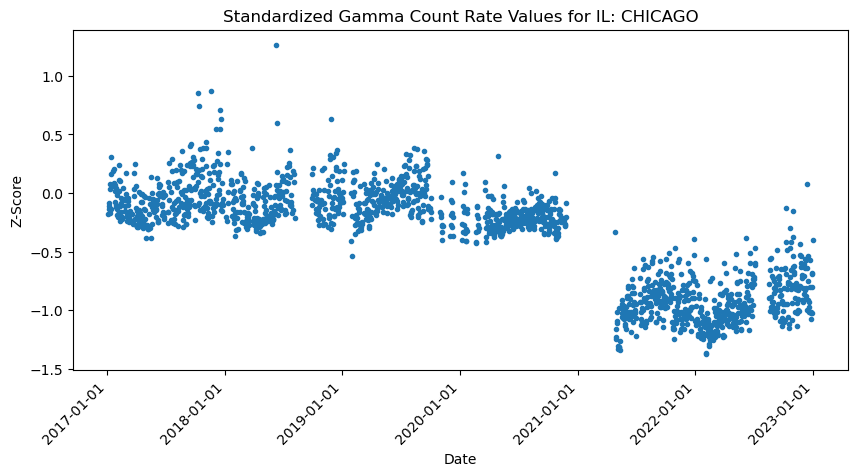

In [ ]:
#@title Plot Chicago, IL GCR standard values from 2017-2023
city='IL: CHICAGO'
start='2017-01-01'
end='2023-01-01'
stype='Gamma Count Rate'
time_series(city,start,end,gcr_df,stype)

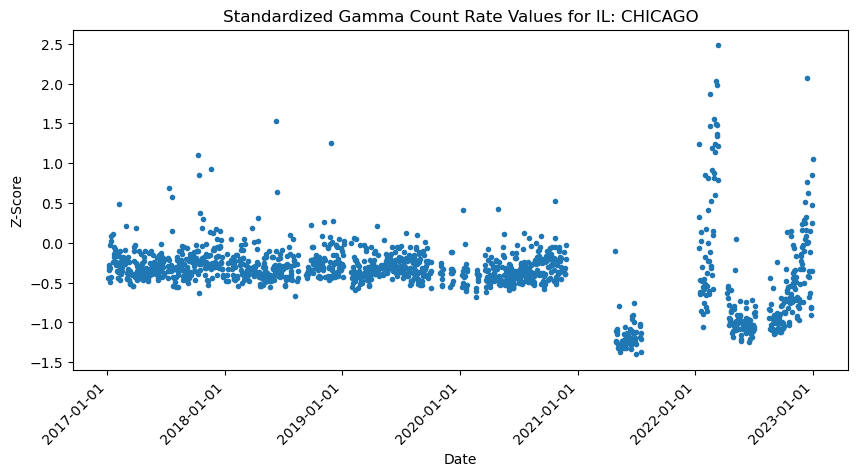

In [ ]:
#@title Plot Chicago, IL DER standard values from 2017-2023
city='IL: CHICAGO'
start='2017-01-01'
end='2023-01-01'
staype='Dose Equivalent Rate'
time_series(city,start,end,der_df, stype)

#Reload Dataframes Into Database

In [ ]:
#@title Connect to database and load datarames as tables
conn = sqlite3.connect('US.db')

# Write the data to a table
der_df.to_sql('US_DER', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [ ]:
#@title List tables in database
list_tables('US.db')

,name
0,US_RAW
1,US
2,US_GCR
3,US_DER


In [ ]:
#@title Check table header
head_table('US.db', 'US_DER')

,START_DATE,READING,LOCATION,Z
0,2016-09-16,31.7,AK: ANCHORAGE,-0.368666
1,2016-09-17,31.4,AK: ANCHORAGE,-0.487913
2,2016-09-18,30.6,AK: ANCHORAGE,-0.805904
3,2016-09-19,29.9,AK: ANCHORAGE,-1.084146
4,2016-09-20,29.7,AK: ANCHORAGE,-1.163644
